## ⚙️ Environment Setup and Data Loading (Alternate Version)

- Installs specific versions of essential libraries to ensure compatibility and reproducibility:
  - `tensorflow==2.12.0`
  - `scikit-learn==1.2.2`
  - `matplotlib==3.7.1`
  - `pandas==2.0.3`
  - `numpy==1.23.5`
- Imports the necessary libraries for data handling, preprocessing, modeling, and visualization.
- Loads the EV charging dataset from the local path (`EVChargingStationUsage.csv`) into a pandas DataFrame for further processing.

> 🔁 This setup block is particularly useful when running the notebook on a fresh environment or outside Google Colab.


In [2]:
# Import Libraries
!pip install tensorflow==2.12.0
!pip install scikit-learn==1.2.2
!pip install matplotlib==3.7.1
!pip install pandas==2.0.3
!pip install numpy==1.23.5
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt


# from google.colab import drive
# drive.mount('/content/drive')
data_path = 'EVChargingStationUsage.csv'
data = pd.read_csv(data_path)
data

INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
  Using cached scipy-1.15.3-cp310-cp310-macosx_14_0_x86_64.whl.metadata (61 kB)
  Using cached google_auth_oauthlib-1.0.0-py2.py3-none-any.whl.metadata (2.7 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-macosx_10_9_x86_64.whl.metadata (1.1 kB)
  Using cached werkzeug-3.1.3-py3-none-any.whl.metadata (3.7 kB)
  Using cached requests_oauthlib-2.0.0-py2.py3-none-any.whl.metadata (11 kB)
  Using cached MarkupSafe-3.0.2-cp310-cp310-macosx_10_9_universal2.whl.met

2025-08-08 11:55:41.480651: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/var/folders/2w/yw9nf3h9675_h3zz3_cgs11r0000gn/T/ipykernel_9085/723177589.py:19: DtypeWarning: Columns (29,30,32) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(data_path)


,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),...,Longitude,Currency,Fee,Ended By,Plug In Event Id,Driver Postal Code,User ID,County,System S/N,Model Number
0,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/29/2011 20:17,PDT,7/29/2011 23:20,PDT,7/29/2011 23:20,3:03:32,1:54:03,...,-122.160309,USD,0.00,Plug Out at Vehicle,3,95124.0,3284.0,NaN,NaN,NaN
1,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 0:00,PDT,7/30/2011 0:02,PDT,7/30/2011 0:02,0:02:06,0:01:54,...,-122.160309,USD,0.00,Customer,4,94301.0,4169.0,NaN,NaN,NaN
2,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 8:16,PDT,7/30/2011 12:34,PDT,7/30/2011 12:34,4:17:32,4:17:28,...,-122.160309,USD,0.00,Plug Out at Vehicle,5,94301.0,4169.0,NaN,NaN,NaN
3,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 14:51,PDT,7/30/2011 16:55,PDT,7/30/2011 16:55,2:03:24,2:02:58,...,-122.160309,USD,0.00,Customer,6,94302.0,2545.0,NaN,NaN,NaN
4,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 18:51,PDT,7/30/2011 20:03,PDT,7/30/2011 20:03,1:11:24,0:43:54,...,-122.160309,USD,0.00,Plug Out at Vehicle,7,94043.0,3765.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259410,PALO ALTO CA / TED THOMPSON #3,0024:B100:0002:9F81,City of Palo Alto,12/31/2020 16:39,PST,12/31/2020 17:14,PST,12/31/2020 17:16,0:35:44,0:35:18,...,-122.144043,USD,0.42,Plug Out at Vehicle,2369,94301.0,2024201,NaN,1.745410e+11,CT4020-HD-GW
259411,PALO ALTO CA / WEBSTER #1,0024:B100:0002:4233,City of Palo Alto,12/31/2020 16:48,PST,12/31/2020 20:31,PST,12/31/2020 20:32,3:43:01,2:14:04,...,-122.158272,USD,4.69,Plug Out at Vehicle,7255,94541.0,242661,Santa Clara County,1.336410e+11,CT4020-HD-GW
259412,PALO ALTO CA / MPL #4,0024:B100:0003:CD37,City of Palo Alto,12/31/2020 17:28,PST,1/1/2021 10:56,PST,1/1/2021 10:57,17:28:14,5:08:12,...,-122.113510,USD,6.82,Plug Out at Vehicle,455,94306.0,449995,Santa Clara County,2.002410e+11,CT4010-HD-GW
259413,PALO ALTO CA / WEBSTER #1,0024:B100:0002:4233,City of Palo Alto,12/31/2020 17:49,PST,12/31/2020 21:55,PST,12/31/2020 21:56,4:05:34,3:53:42,...,-122.158272,USD,2.75,Plug Out at Vehicle,7256,94552.0,804075,Santa Clara County,1.336410e+11,CT4020-HD-GW


## 📊 Feature Selection Based on Correlation

This step performs advanced preprocessing to prepare the dataset for feature selection:

- **Removes duplicate columns** (if any) related to previously computed time-in-seconds fields.
- **Converts all datetime columns** into numeric timestamp format (`int64`) for compatibility with correlation and modeling.
- **Encodes non-numeric categorical columns** using `LabelEncoder` to make them numeric and usable in correlation analysis.
- **Computes the correlation matrix** for all numeric columns, focusing on how each feature correlates with `Energy (kWh)`.
- **Filters and selects features** that have a correlation coefficient greater than 0.5 with the target variable, assuming they have predictive power.
- **Prints** the sorted correlation values and the final list of relevant features for modeling.

> ✅ This is a useful technique for reducing dimensionality and retaining only the most impactful variables for training.


In [5]:
# Remove additional columns if they already exist
# columns_to_remove = ["Charging Time (hh:mm:ss) (seconds)", "Total Duration (hh:mm:ss) (seconds)"]
# data = data.drop(columns=[col for col in columns_to_remove if col in data.columns], errors='ignore')

# Convert datetime columns to numeric timestamps
datetime_columns = [col for col in data.columns if "Date" in col or "Time" in col]
for col in datetime_columns:
    if col in data.columns:
        data[col] = pd.to_datetime(data[col], errors='coerce').astype('int64', errors='ignore')

# Encode non-numeric columns
non_numeric_columns = data.select_dtypes(include=['object']).columns.tolist()
for col in non_numeric_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))

# Calculate the correlation matrix for numeric columns
correlation_matrix = data.corr(numeric_only=True)
correlation_with_energy = correlation_matrix["Energy (kWh)"].sort_values(ascending=False)

# Filter features with correlation > 0.5
relevant_features = correlation_with_energy[correlation_with_energy > 0.5].index.tolist()

# Display the correlation factors and relevant features
print("Correlation with Energy (kWh):")
print(correlation_with_energy)
print("\nRelevant Features:")
print(relevant_features)


C:\Users\Subhamyu.Nepal\AppData\Local\Temp\ipykernel_17960\4145061786.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[col] = pd.to_datetime(data[col], errors='coerce').astype('int64', errors='ignore')
C:\Users\Subhamyu.Nepal\AppData\Local\Temp\ipykernel_17960\4145061786.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[col] = pd.to_datetime(data[col], errors='coerce').astype('int64', errors='ignore')
C:\Users\Subhamyu.Nepal\AppData\Local\Temp\ipykernel_17960\4145061786.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[col] = pd.to_datetime(data[col], 

Correlation with Energy (kWh):
Energy (kWh)                       1.000000
GHG Savings (kg)                   1.000000
Gasoline Savings (gallons)         1.000000
Charging Time (hh:mm:ss)           0.871576
Total Duration (hh:mm:ss)          0.584751
Fee                                0.521298
Port Type                          0.103145
Station Name                       0.095423
Start Date                         0.089981
Org Name                           0.065510
Ended By                           0.053452
MAC Address                        0.044920
End Date                           0.039576
Plug In Event Id                   0.035849
Latitude                           0.033891
Transaction Date (Pacific Time)    0.020471
Longitude                          0.007940
Driver Postal Code                 0.002980
EVSE ID                            0.002193
Port Number                        0.001983
User ID                           -0.000971
Address 1                         -0.014890
S

## 🔥 Visualize Feature Correlations with Heatmap

- Creates a **correlation heatmap** using `seaborn` to visually explore relationships between numeric features.
- Uses the `"Reds"` colormap to emphasize stronger correlations in deeper red shades.
- Enhancements include:
  - Larger figure size for better readability.
  - Square cells with borders (`linewidths=0.5`).
  - Rotated axis labels for clarity.
- Helps identify:
  - Strongly correlated variables (redundant features).
  - Features with strong linear relationship to the target (`Energy (kWh)`).

> 📌 This visual diagnostic is key for feature selection, multicollinearity detection, and understanding dataset structure.


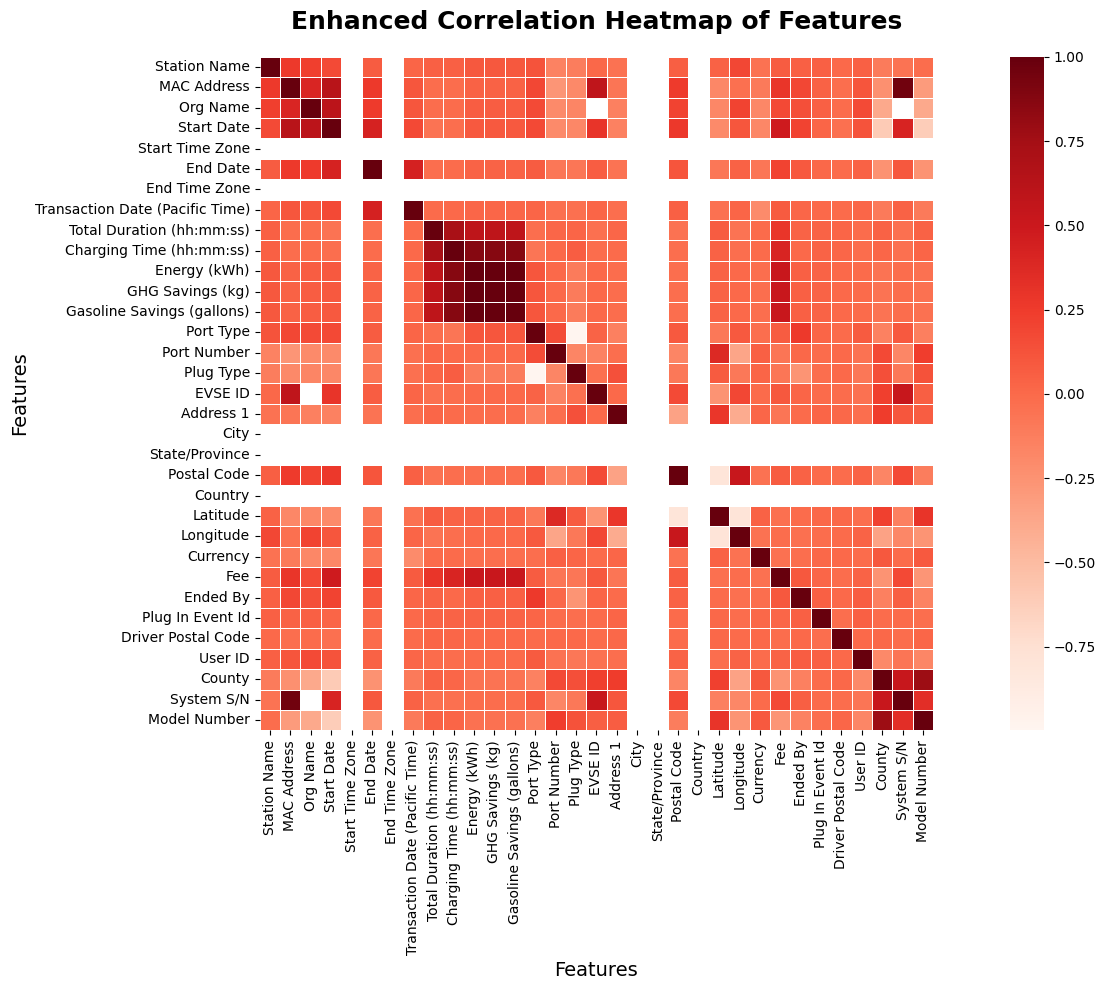

In [6]:

import seaborn as sns


plt.figure(figsize=(16, 10))
heatmap = sns.heatmap(
    correlation_matrix,
    annot=False,  # Remove correlation factors
    cmap="Reds",  # Use the "Reds" colormap for a red theme
    cbar=True,
    linewidths=0.5,
    square=True
)

# Add titles and labels
plt.title("Enhanced Correlation Heatmap of Features", fontsize=18, fontweight='bold', pad=20)
plt.xlabel("Features", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.xticks(fontsize=10, rotation=90)  # Set rotation to 90 for vertical text
plt.yticks(fontsize=10, rotation=0)

# Show the heatmap
plt.tight_layout()
plt.show()

